In [342]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest = pd.read_csv("../../data_files/data_from_android_api/rest/rest_25_mins.csv")

forward_android1 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_1.csv")
forward_android2 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_2.csv")
forward_android3 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_3.csv")
forward_android4 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_5.csv")

back1 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_1.csv')
back2 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_2.csv')
back3 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_3.csv')
back4 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_4.csv')
back5 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_5.csv')

forward = pd.concat([forward_android1, forward_android2, forward_android3,
                     forward_android4, forward_android5])

back = pd.concat([back1, back2, back3, back4, back5])

dataDF = pd.concat([forward, back, rest])

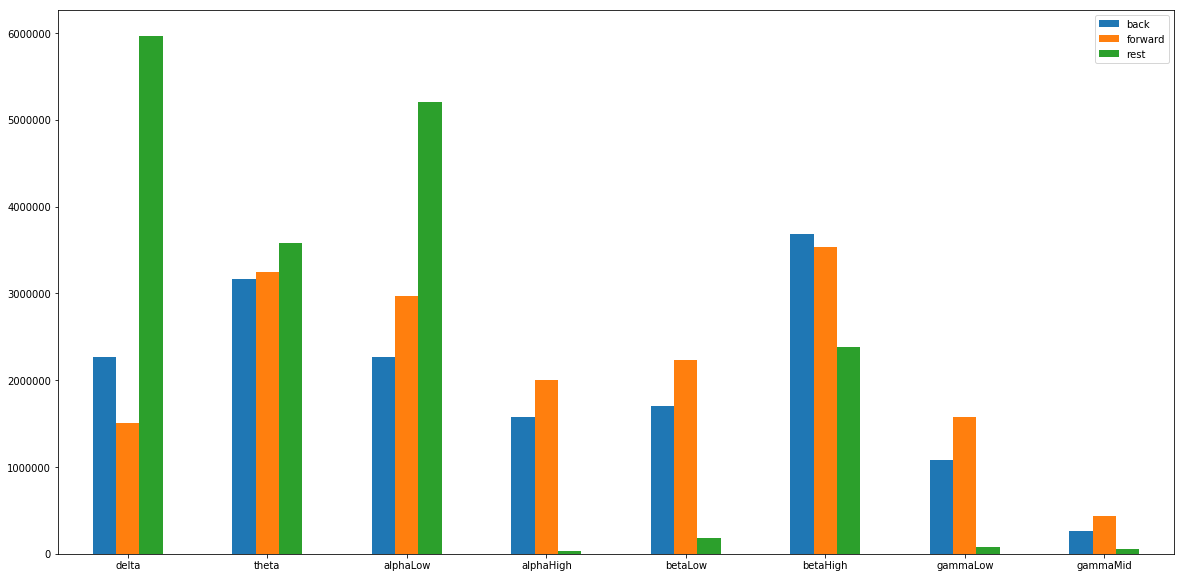

In [343]:
%matplotlib inline 
import matplotlib.pyplot as plt 

u = [back.delta.mean(), back.theta.mean(), back.alphaLow.mean(), 
     back.betaHigh.mean(), back.betaLow.mean(), back.alphaHigh.mean(), 
     back.gammaLow.mean(), back.gammaMid.mean()]

d = [forward.delta.mean(), forward.theta.mean(), forward.alphaLow.mean(), 
     forward.betaHigh.mean(), forward.betaLow.mean(), forward.alphaHigh.mean(), 
     forward.gammaLow.mean(), forward.gammaMid.mean()]

r = [rest.delta.mean(), rest.theta.mean(), rest.alphaLow.mean(), 
     rest.alphaHigh.mean(), rest.betaLow.mean(), rest.betaHigh.mean(), 
     rest.gammaLow.mean(), rest.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'back': u, 'forward': d, 'rest': r}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [511]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

encoder = LabelBinarizer()
encoder = LabelEncoder()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)
print(x_train.max())
print(x_train.min())

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = stan_scaler.fit_transform(x_train)
x_test = stan_scaler.transform(x_test)

all_labels = dataDF.action.values

all_data = dataDF.drop(['action'], axis=1)

16777213
102


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [396]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(rfc.feature_importances_)

print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


scores = cross_val_score(rfc, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(rfc.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = RandomForestClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.13979864 0.07303808 0.09209938 0.29662231 0.06569555 0.06942355
 0.15811283 0.10520967]
The score for Random Forest  0.737382378100941
3504
Accuracy for x_test: 0.737382378100941
Cross Validation Accuracy: 0.72 (+/- 0.16)
[0.55223881 0.59061834 0.74145299 0.74786325 0.78372591 0.80513919
 0.74946467 0.78540773 0.68025751 0.72317597]
Thresh=0.066, n=8, Accuracy: 73.82%
Thresh=0.069, n=7, Accuracy: 71.26%
Thresh=0.073, n=6, Accuracy: 73.05%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Thresh=0.092, n=5, Accuracy: 71.51%
Thresh=0.105, n=4, Accuracy: 71.94%
Thresh=0.140, n=3, Accuracy: 68.86%
Thresh=0.158, n=2, Accuracy: 59.11%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Thresh=0.297, n=1, Accuracy: 56.89%


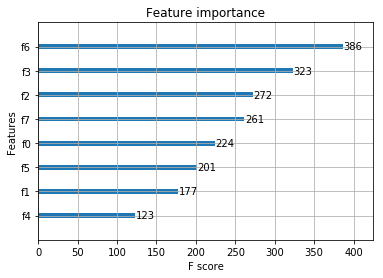

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The score for XGBoost  0.7818648417450813
Accuracy for x_test: 0.7818648417450813
Accuracy: 78.19%
Cross Validation Accuracy: 0.75 (+/- 0.21)
[0.51812367 0.57142857 0.76709402 0.81837607 0.80513919 0.83511777
 0.79657388 0.85622318 0.7360515  0.74678112]
Thresh=0.063, n=8, Accuracy: 78.19%
Thresh=0.090, n=7, Accuracy: 78.19%
Thresh=0.102, n=6, Accuracy: 77.16%
Thresh=0.114, n=5, Accuracy: 78.44%
Thresh=0.133, n=4, Accuracy: 69.38%
Thresh=0.138, n=3, Accuracy: 67.75%
Thresh=0.164, n=2, Accuracy: 66.64%
Thresh=0.196, n=1, Accuracy: 62.45%


In [512]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

# plot feature importance
plot_importance(xgb)
pyplot.show()
print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [382]:
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["auc","error"]

# Model Tuning and feature importance XGBoost

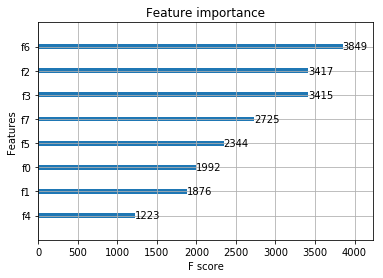

The score for XGBoost  0.7724550898203593
Accuracy for x_test: 0.7724550898203593
Accuracy: 77.25%
Cross Validation Accuracy: 0.75 (+/- 0.21)
[0.53518124 0.56289979 0.76068376 0.83547009 0.80085653 0.85010707
 0.80085653 0.85622318 0.73390558 0.73390558]
Thresh=0.059, n=8, Accuracy: 77.25%
Thresh=0.090, n=7, Accuracy: 77.25%
Thresh=0.096, n=6, Accuracy: 77.25%
Thresh=0.112, n=5, Accuracy: 70.83%
Thresh=0.131, n=4, Accuracy: 69.97%
Thresh=0.164, n=3, Accuracy: 67.07%
Thresh=0.164, n=2, Accuracy: 65.70%
Thresh=0.185, n=1, Accuracy: 63.39%


In [513]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

xgb = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 1,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=2)
xgb.fit(x_train, y_train)
# plot feature importance
plot_importance(xgb)
pyplot.show()
# print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 1,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=2)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [516]:
# import xgboost as xgb
# dtrain = xgb.DMatrix(data, label=labels)
# param = {'max_depth': 5, 'eta': 1, 'silent': 1, 'objective': 'multi:softprob'}
# bst = xgb.train(param, dtrain, 10)
# bst.dump_model(xgb, './out/xgb_76.txt', with_stats=True) 
from sklearn.externals import joblib
#save model
joblib.dump(xgb, './out/xgb_77.dat') 

['./out/xgb_77.dat']

In [492]:
min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

from keras.utils import np_utils
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [449]:
encoder.inverse_transform([argmax(y_test[2], axis=0)])

array(['forward'], dtype=object)

In [352]:
encoder.inverse_transform(y_train)

ValueError: bad input shape (3504, 3)

In [448]:
y_test[2]

array([0., 1., 0.], dtype=float32)

In [410]:
x_test[1]

array([9.69089120e-02, 1.18247854e-02, 9.99470707e-01, 1.81982260e-03,
       1.68314415e-03, 9.99408936e-01, 9.98372423e-01, 1.91273015e-04])

In [429]:
y_test[0]

array([1., 0., 0.], dtype=float32)

In [416]:
x_test[1]

array([9.69089120e-02, 1.18247854e-02, 9.99470707e-01, 1.81982260e-03,
       1.68314415e-03, 9.99408936e-01, 9.98372423e-01, 1.91273015e-04])

In [468]:
a = [[852567, 133691, 16747769, 19974, 16748623, 14364, 4845, 34877]]
# a = min_max_scaler.transform(a)
a_std = (a[0][0] - 16777208) / (1 - 0)
a_scaled = a_std * (16777208 - 92) + 0

a[0][0] = a[0][0] / a_scaled
a[0][0]

-3.191108426034229e-09

In [469]:
a = [[852567, 133691, 16747769, 19974, 16748623, 14364, 4845, 34877]]
a = min_max_scaler.transform(a)
a[0]

array([3.08039802e+05, 5.29452372e+04, 6.71576160e+06, 7.02342478e+03,
       4.45729208e+06, 4.61178518e+03, 1.09535275e+03, 4.40501821e+03])

In [493]:
data = [[50, 1800, 3,4,5,6,7,7]]
dj = min_max_scaler.transform(data)

print(min_max_scaler.data_max_)

print(dj)


[1. 1. 1. 1. 1. 1. 1. 1.]
[[  50. 1800.    3.    4.    5.    6.    7.    7.]]


In [495]:
data = [[34, 1800]]

dataStd = (1800 - 92) / (16777208 - 92)
data_scaled = dataStd * (1 - 0) + 0
data_scaled

0.00010180534008348038

In [481]:
data = [[34, 1800]]

dataStd = (34 - 92) / (16777208 - 92)
data_scaled = dataStd * (1 - 0) + 0
data_scaled

-3.457090002834814e-06

In [480]:
data = [[34, 1800]]

dataStd = (50 - 92) / (16777208 - 92)
data_scaled = dataStd * (1 - 0) + 0
data_scaled

-2.503410002052796e-06

In [446]:
from numpy import argmax
import keras

argmax(y_test[3], axis=0)

2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_121 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_122 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_123 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_124 (Dense)            (None, 3)                 51        
Total params: 3,891
Trainable params: 3,891
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3504/3504 [==============================] - 6s 2ms/step - loss: 1.0390 - acc: 0.4432
Epoch 2/100
3504/3504 [===================

3504/3504 [==============================] - 4s 1ms/step - loss: 0.7186 - acc: 0.6470
Epoch 74/100
3504/3504 [==============================] - 4s 1ms/step - loss: 0.7187 - acc: 0.6581
Epoch 75/100
3504/3504 [==============================] - 4s 1ms/step - loss: 0.7175 - acc: 0.6581
Epoch 76/100
3504/3504 [==============================] - 4s 1ms/step - loss: 0.7096 - acc: 0.6527
Epoch 77/100
3504/3504 [==============================] - 4s 1ms/step - loss: 0.7156 - acc: 0.6555
Epoch 78/100
3504/3504 [==============================] - 5s 1ms/step - loss: 0.7078 - acc: 0.6530
Epoch 79/100
3504/3504 [==============================] - 4s 1ms/step - loss: 0.7036 - acc: 0.6607
Epoch 80/100
3504/3504 [==============================] - 4s 1ms/step - loss: 0.7071 - acc: 0.6513A: 1s - loss
Epoch 81/100
3504/3504 [==============================] - 5s 1ms/step - loss: 0.7066 - acc: 0.6572
Epoch 82/100
3504/3504 [==============================] - 4s 1ms/step - loss: 0.6999 - acc: 0.6587A: 1s - loss

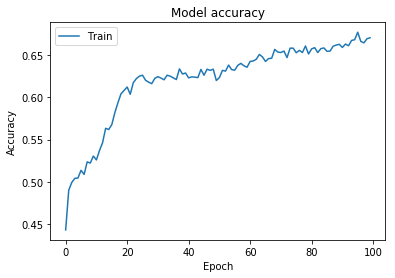

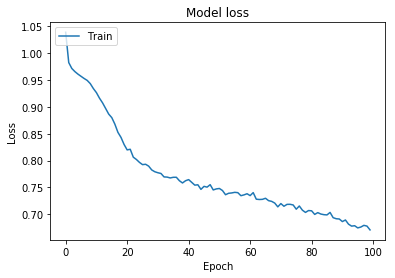

In [400]:


from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(16, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dense(32, activation="relu"))
# network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(16, activation="softmax"))
network.add(layers.Dense(3, activation='softmax'))

# Adam = Adam(lr=0.05)
network.compile(optimizer=Adam(lr=0.00038),
                loss='categorical_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train,
                      epochs=100, verbose=1, batch_size=2)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [89]:
def keras_to_tensorflow(keras_model, output_dir, model_name,out_prefix="output_", log_tensorboard=True):

    if os.path.exists(output_dir) == False:
        os.mkdir(output_dir)

    out_nodes = []

    for i in range(len(keras_model.outputs)):
        out_nodes.append(out_prefix + str(i + 1))
        tf.identity(keras_model.output[i], out_prefix + str(i + 1))

    sess = K.get_session()

    from tensorflow.python.framework import graph_util, graph_io

    init_graph = sess.graph.as_graph_def()

    main_graph = graph_util.convert_variables_to_constants(sess, init_graph, out_nodes)

    graph_io.write_graph(main_graph, output_dir, name=model_name, as_text=False)

    if log_tensorboard:
        from tensorflow.python.tools import import_pb_to_tensorboard

        import_pb_to_tensorboard.import_to_tensorboard(
            os.path.join(output_dir, model_name),
            output_dir)
        
keras_to_tensorflow(network, './out', 'cat_dog.pb')

INFO:tensorflow:Froze 10 variables.
INFO:tensorflow:Converted 10 variables to const ops.
Model Imported. Visualize by running: tensorboard --logdir=./out


In [85]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.
 
    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph
    
from keras import backend as K
 
# Create, compile and train model...
 
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in network.outputs])

tf.train.write_graph(frozen_graph, "./out/", "my_model.pb", as_text=False)

INFO:tensorflow:Froze 720 variables.
INFO:tensorflow:Converted 720 variables to const ops.


'./out/my_model.pb'

# Export model

In [87]:
# This was created with @warptime's help. Thank you!

from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras.models import load_model
from keras import backend as K
import os.path as osp

model = load_model('out/8_wave_input_67pc.h5')
nb_classes = 3 # The number of output nodes in the model
prefix_output_node_names_of_final_network = 'output_node'

K.set_learning_phase(0)

pred = [None]*nb_classes
pred_node_names = [None]*nb_classes
for i in range(nb_classes):
    pred_node_names[i] = prefix_output_node_names_of_final_network+str(i)
    pred[i] = tf.identity(model.output[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

sess = K.get_session()
output_fld = './tensorflow_model/'
if not os.path.isdir(output_fld):
    os.mkdir(output_fld)
output_graph_name = 'model' + '.pb'
output_graph_suffix = '_inference'

constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
graph_io.write_graph(constant_graph, output_fld, output_graph_name, as_text=False)
print('saved the constant graph (ready for inference) at: ', osp.join(output_fld, output_graph_name))

output nodes names are:  ['output_node0', 'output_node1', 'output_node2']
INFO:tensorflow:Froze 20 variables.
INFO:tensorflow:Converted 20 variables to const ops.
saved the constant graph (ready for inference) at:  ./tensorflow_model/model.pb


# Check the frozen nodes

In [79]:
g = tf.GraphDef()

g.ParseFromString(open('./out/my_model.pb', 'rb').read())

[n for n in g.node if n.name.find('output') != -1]


[]

In [54]:
ops = set([n.op for n in g.node])
print(" ".join(ops))

Placeholder MatMul StridedSlice Identity BiasAdd Const Relu Softmax


In [91]:
def print_graph_nodes(filename):
    import tensorflow as tf
    g = tf.GraphDef()
    g.ParseFromString(open(filename, 'rb').read())
    print()
    print(filename)
    print("=======================INPUT=========================")
    print([n for n in g.node if n.name.find('input') != -1])
    print("=======================OUTPUT========================")
    print([n for n in g.node if n.name.find('output') != -1])
    print("===================KERAS_LEARNING=====================")
    print([n for n in g.node if n.name.find('keras_learning_phase') != -1])
    print("======================================================")
    print()
    
print_graph_nodes('./out/cat_dog.pb')


./out/cat_dog.pb
=======================INPUT=========================
[name: "dense_21_input"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: 8
      }
    }
  }
}
]
=======================OUTPUT========================
[name: "output_1"
op: "Identity"
input: "strided_slice_28"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
]
===================KERAS_LEARNING=====================
[]



In [ ]:

    
# create an array of shape 30706, 9 = number of records by the features
all_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    all_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

all_data = scaler.fit_transform(all_data)


# estimator = KerasClassifier(build_fn=network, epochs=50, batch_size=5, verbose=0)

# kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(estimator, all_data, labels, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:

from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, random_state=12)
avg_loss = []
avg_acc = []
# Loop through the indices the split() method returns
for index, (train_index, test_index) in enumerate(skf.split(all_data, labels)):
    
    print("Training on fold " + str(index + 1) + "/5.............................................")
    # Generate batches from indices
    x_train, x_test = all_data[train_index], all_data[test_index]
    # use one-hot vectors as labels
    y_train, y_test = labels[train_index], labels[test_index]
    
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

#     network = models.Sequential()
    

#     network.add(layers.Dense(16, input_shape=(8,)))
#     network.add(layers.Dense(32, activation="relu"))
#     network.add(layers.Dense(64, activation="relu"))
#     network.add(layers.Dense(32, activation="relu"))
#     network.add(layers.Dense(16, activation="sigmoid"))
#     network.add(layers.Dense(1, activation='sigmoid'))

#     # Adam = Adam(lr=0.05)
#     network.compile(optimizer=Adam(lr=0.00038),
#                     loss='binary_crossentropy',
#                     metrics=['acc'])

#     network.summary()

    history = network.fit(x_train, y_train,
                          epochs=50, verbose=1, batch_size=2)

    loss, accuracy = network.evaluate(x_test, y_test)

    # evaluate and store the accuracy
#     loss, accuracy = model.evaluate(xtest_imagelist, ytest, verbose=1)
    avg_loss.append(loss)
    avg_acc.append(accuracy)

    # cross validation score
    print("Average accuracy of model on the dev set = ", np.mean(avg_acc))

In [131]:
# create an array of shape 30706, 9 = number of records by the features
my_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    my_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    

In [133]:
my_data[0]

array([  293486,   169847, 16770347,    28759,    28307,     7008,
           5211,     5725])

In [136]:
d = scaler.transform(my_data)

In [137]:
d[0]

array([1.07884200e+05, 6.59300516e+04, 6.79123309e+06, 1.00209796e+04,
       7.53367234e+03, 2.25954797e+03, 1.15743328e+03, 6.22122119e+02])

In [134]:
dataDF

,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid,action
0,293486,169847,16770347,28759,28307,7008,5211,5725,forward
1,219927,84627,16749408,16772985,16750406,16744828,17577,11853,forward
2,1223538,69243,5978,19828,5765,4607,3275,1360,forward
3,52759,16759937,16776059,23453,16774798,16757682,15741,13406,forward
4,5739,15953,10187,29948,16774325,18815,9419,7534,forward
5,215041,57860,16763132,26369,22267,24313,21687,3428,forward
6,2052855,39016,11030,7417,13363,11244,2012,654,forward
7,16765651,9242,2000,150,781,200,16777098,16777119,forward
8,2037932,289261,16770585,16758528,30784,10510,10734,4948,forward
9,61363,83369,20732,16505,15144,19571,12883,5764,forward
